# Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных 
библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston=load_boston()
data=boston.data
feature_names=boston.feature_names
x=pd.DataFrame(data,columns=feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. 

In [7]:
y=boston.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

Масштабируйте данные с помощью StandardScaler. 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled=pd.DataFrame(x_train_scaled, columns=feature_names)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=feature_names)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. 

In [11]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne=tsne.fit_transform(x_train_scaled)
x_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

Постройте диаграмму рассеяния на этих данных.

In [12]:
x_train_tsne.shape

(404, 2)

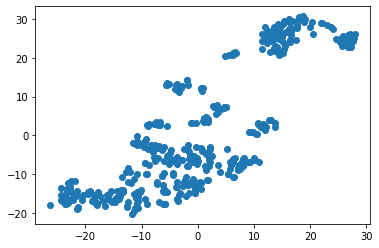

In [13]:
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1])

# Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,max_iter=100,random_state=42)
labels_train=kmeans.fit_predict(x_train_scaled)
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения price и CRIM в разных кластерах.

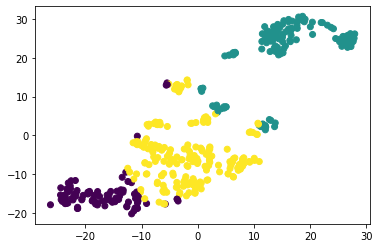

In [16]:
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1],c=labels_train)

In [20]:
y_train[labels_train==0].mean()

27.78837209302326

In [21]:
y_train[labels_train==1].mean()

16.165354330708663

In [22]:
y_train[labels_train==2].mean()

24.958115183246072

In [24]:
x_train.loc[labels_train==0,'CRIM'].mean()

0.07356558139534886

In [25]:
x_train.loc[labels_train==1,'CRIM'].mean()

10.797028425196853

In [27]:
x_train.loc[labels_train==2,'CRIM'].mean()

0.42166020942408367

# * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [29]:
labels_test=kmeans.fit_predict(x_test_scaled)
pd.value_counts(labels_test)

1    53
2    35
0    14
dtype: int64

In [31]:
y_test[labels_test==0].mean()

33.871428571428574

In [32]:
y_test[labels_test==1].mean()

21.552830188679245

In [34]:
y_test[labels_test==2].mean()

16.43714285714286

In [35]:
x_test.loc[labels_test==0,'CRIM'].mean()

0.08618571428571427

In [36]:
x_test.loc[labels_test==1,'CRIM'].mean()

0.25200716981132076

In [37]:
x_test.loc[labels_test==2,'CRIM'].mean()

10.165531142857143